<a href="https://colab.research.google.com/github/muhammadnaqeeb/AI-Lab-Work/blob/main/Lab_8_Activities_and_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 08
# **Hill Climbing Search**
> Muhammad Naqeeb

> fa20-bcs-012

> To: Mr. Qazi Zia

# **Lab Task 1**

Write a program that implements Hill Climbing algorithms to 
solve this maze. Write the path followed (in the form of 
coordinates) and the cost of the path

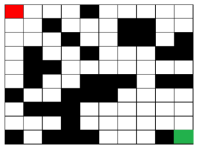

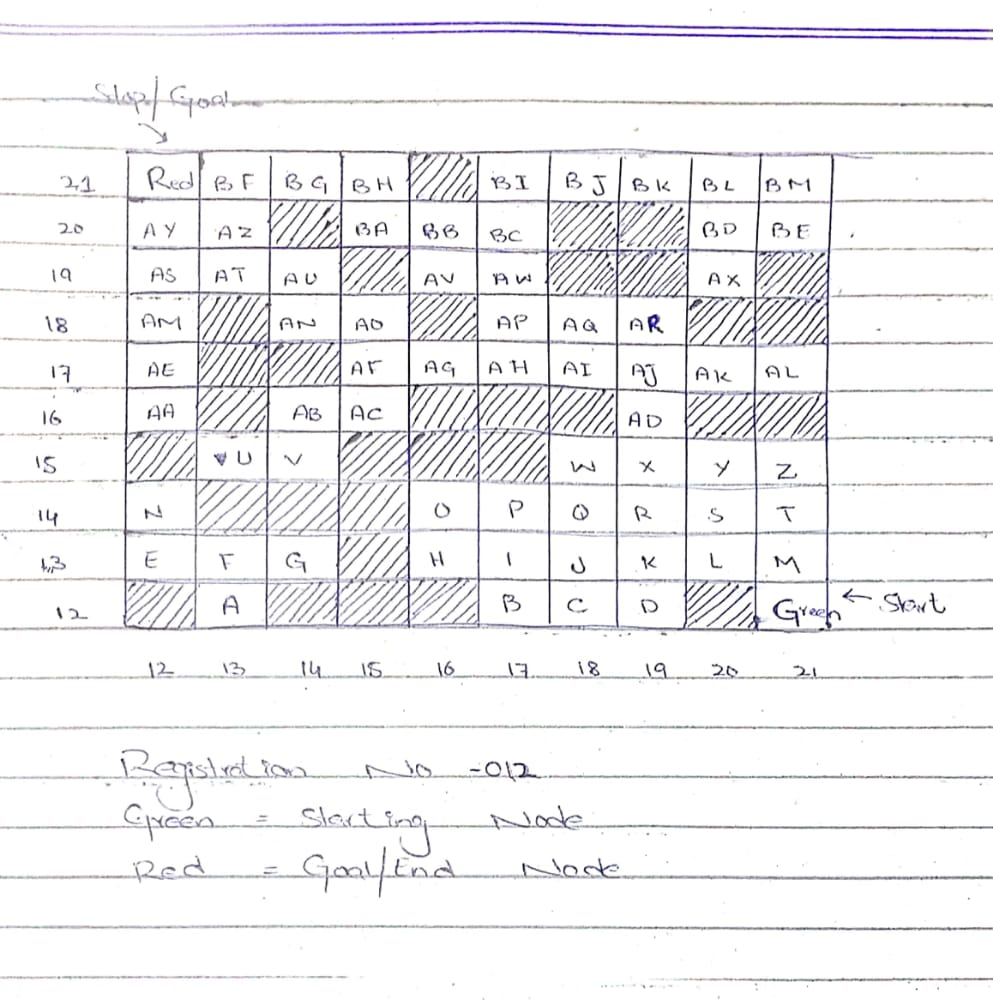

In [ ]:
# Hill Climbing Search

import math

class Node:
    def __init__(self, state, parent, actions, totalCost, heuristic):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalCost = totalCost
        self.heuristic = heuristic
        
        
def HCS():
    graph = {'A': Node('A', None, [('F',13)], 12, (12,12)),
             'B': Node('B', None, [('I',13), ('C',13)], 12, (12,17)),
             'C': Node('C', None, [('B',13), ('D',13), ('J',13)], 12, (12,18)),
             'D': Node('D', None, [('C',13), ('K',13)], 12, (12,19)),
             'E': Node('E', None, [('N',13), ('F',13)], 12, (13,12)),
             'F': Node('F', None, [('A',13), ('E',13), ('G',13)], 12, (13,13)),
             'G': Node('G', None, [('F',13)], 12, (13,14)),
             'H': Node('H', None, [('O',13), ('I',13)], 12, (13,16)),
             'I': Node('I', None, [('H',13), ('B',13), ('J',13), ('P',13)], 12, (13,17)),
             'J': Node('J', None, [('C',13), ('I',13), ('K',13), ('Q',13)], 12, (13,18)),
             'K': Node('K', None, [('J',13), ('D',13), ('L',13), ('R',13)], 12, (13,19)),
             'L': Node('L', None, [('K',13), ('S',13), ('M',13)], 12, (13,20)),
             'M': Node('M', None, [('L',13), ('Green',13), ('T',13)], 12, (13,21)),
             'N': Node('N', None, [('E',13)], 12, (14,12)),
             'O': Node('O', None, [('H',13), ('P',13)], 12, (14,16)),
             'P': Node('P', None, [('O',13), ('Q',13), ('I',13)], 12, (14,17)),
             'Q': Node('Q', None, [('W',13), ('P',13), ('J',13), ('R',13)], 12, (14,18)),
             'R': Node('R', None, [('Q',13), ('X',13), ('S',13), ('K',13)], 12 ,(14,19)),
             'S': Node('S', None, [('T',13), ('R',13), ('L',13), ('Y',13)], 12, (14,20)),
             'T': Node('T', None, [('S',13), ('Z',13), ('M',13)], 12, (14,21)),
             'U': Node('U', None, [('V',13)], 12, (15,13)),
             'V': Node('V', None, [('U',13), ('AB',13)], 12, (15,14)),
             'W': Node('W', None, [('X',13),('Q',13)], 12, (15,18)),
             'X': Node('X', None, [('Y',13), ('W',13), ('R',13), ('AD',13)], 12, (15,19)),
             'Y': Node('Y', None, [('S',13), ('X',1), ('Z',13)], 12, (15,120)),
             'Z': Node('W', None, [('Y',13), ('T',13)], 12, (15,21)),
             
             'AA': Node('AA', None, [('AE',13)], 12, (16,12)),
             'AB': Node('AB', None, [('V',13), ('AC',13)], 12, (16,14)),
             'AC': Node('AC', None, [('AB',13), ('AF',13)], 12, (16,15)),
             'AD': Node('AD', None, [('X',13), ('AJ',13)], 12, (16,19)),
             'AE': Node('AE', None, [('AA',13), ('AM',13)], 12, (17,12)),
             'AF': Node('AF', None, [('AO',13), ('AC',13), ('AG',13)], 12, (17,15)),
             'AG': Node('AG', None, [('AF',13), ('AH',13)], 12, (17,16)),
             'AH': Node('AH', None, [('AG',13), ('AI',13), ('AP',13)], 12, (17,17)),
             'AI': Node('AI', None, [('AH',13), ('AG',13), ('AJ',13)], 12, (17,18)),
             'AJ': Node('AJ', None, [('AR',13), ('AI',13), ('AK',13), ('AD',13)], 12, (17,19)),
             'AK': Node('AK', None, [('AJ',13), ('AL',13)], 12, (17,20)),
             'AL': Node('AL', None, [('AK',13)], 12, (17,21)),
             'AM': Node('AM', None, [('AS',13), ('AE',13)], 12, (18,12)),
             'AN': Node('AN', None, [('AU',13), ('AO',13)], 12, (18,14)),
             'AO': Node('AO', None, [('AF',13), ('AN',13)], 12, (18,15)),
             'AP': Node('AP', None, [('AW',13), ('AQ',13), ('AH',13)], 12, (18,17)),
             'AQ': Node('AQ', None, [('AR',13), ('AP',13), ('AI',13)], 12, (18,18)),
             'AR': Node('AR', None, [('AQ',13), ('AJ',13)], 12 ,(18,19)),
             'AS': Node('AS', None, [('AT',13), ('AY',13), ('AM',13)], 12, (19,12)),
             'AT': Node('AT', None, [('AS',13), ('AZ',13), ('AU',13)], 12, (19,13)),
             'AU': Node('AU', None, [('AT',13), ('AN',13)], 12, (19,14)),
             'AV': Node('AV', None, [('BB',13), ('AW',13)], 12, (19,16)),
             'AW': Node('AW', None, [('AV',13), ('AP',13), ('BC',13)], 12, (19,17)),
             'AX': Node('AX', None, [('BD',13)], 12, (19,20)),
             'AY': Node('AY', None, [('AZ',13), ('Red',13)], 12, (20,12)),
             'AZ': Node('AZ', None, [('AY',13), ('BF',13)], 12, (20,13)),

             'BA': Node('BA', None, [('BH',13),('BB',13)], 12, (20,15)),
             'BB': Node('BB', None, [('BA',13), ('AV',13),('BC',13)], 12, (20,16)),
             'BC': Node('BC', None, [('BB',13), ('AW',13), ('BI',13)], 12, (20,17)),
             'BD': Node('BD', None, [('BL',13), ('AX',13),('BE',13)], 12, (20,20)),
             'BE': Node('BE', None, [('BD',13), ('BM',13)], 12, (20,21)),
             'BF': Node('BF', None, [('Red',13), ('AZ',13), ('G',13)], 12, (21,13)),
             'BG': Node('BG', None, [('BF',13),('BH',13)], 12, (21,14)),
             'BH': Node('BH', None, [('BG',13), ('BA',13)], 12, (21,15)),
             'BI': Node('BI', None, [('BJ',13), ('BC',13)], 12, (21,17)),
             'BJ': Node('BJ', None, [('BI',13), ('BK',13)], 12, (21,18)),
             'BK': Node('BK', None, [('BJ',13), ('BL',13)], 12, (21,19)),
             'BL': Node('BL', None, [('BK',13), ('BM',13)], 12, (21,20)),
             'BM': Node('BM', None, [('BL',13), ('BE',13)], 12, (21,21)),

             'Red': Node('Red', None, [('AY',13),('BF',13)], 12, (21,12)),
             'Green': Node('Green', None, [('M',13)], 12, (12,21))
             }
    
    initialState = 'Green'
    goalState = 'Red'
    parentNode = initialState
    parentCost = math.sqrt((graph[goalState].heuristic[0] - \
                            graph[initialState].heuristic[0])**2 +\
                            (graph[goalState].heuristic[1] - \
                             graph[initialState].heuristic[1])**2)
    explored = []
    solution = []
    minChildCost = parentCost - 1
     
    while parentNode != goalState:
        bestNode = parentNode
        minChildCost = parentCost
        explored.append(parentNode)
        
        for child in graph[parentNode].actions:
            if child[0] not in explored:
                childCost = math.sqrt((graph[goalState].heuristic[0]\
                                       - graph[child[0]].heuristic[0]) **2\
                                       + (graph[goalState].heuristic[1]\
                                       - graph[child[0]].heuristic[1]) **2)
                if childCost < minChildCost:
                    bestNode = child[0]
                    minChildCost = childCost
        if bestNode == parentNode:
            break
        else:
            parentNode = bestNode
            parentCost = minChildCost
            solution.append(parentNode)
    return solution

sol = HCS()
print(sol)

    

['M', 'L', 'K', 'R', 'Q', 'W']


> **Activity 1:**

For the given graph , imagine node A as starting node and your goal is to reach Y. Apply hill climbing and see how closer you can get to your destination.

**Solution:**

Instead of maintaining a fringe or a frontier to save the nodes that are to be explored, hill climbing just explores the best child of a given node, then explores the best grandchild of a particular child and so on and so forth.

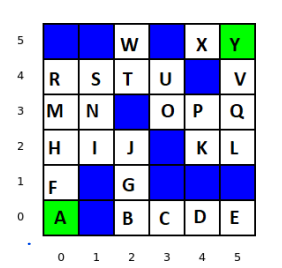

In [ ]:
# Hill Climbing Search

import math

class Node:
    def __init__(self, state, parent, actions, totalCost, heuristic):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalCost = totalCost
        self.heuristic = heuristic
        
        
def HCS():
    graph = {'A': Node('A', None, [('F',1)], 0, (0,0)),
             'B': Node('B', None, [('G',1), ('C',1)], 0, (2,0)),
             'C': Node('C', None, [('B',1), ('D',1)], 0, (3,0)),
             'D': Node('D', None, [('C',1), ('E',1)], 0, (4,0)),
             'E': Node('E', None, [('D',1)], 0, (5,0)),
             'F': Node('F', None, [('A',1), ('H',1)], 0, (0,1)),
             'G': Node('G', None, [('B',1), ('J',1)], 0, (2,1)),
             'H': Node('H', None, [('F',1), ('I',1), ('M',1)], 0, (0,2)),
             'I': Node('I', None, [('H',1), ('J',1), ('N',1)], 0, (1,2)),
             'J': Node('J', None, [('G',1), ('I',1)], 0, (2,2)),
             'K': Node('K', None, [('L',1), ('P',1)], 0, (4,2)),
             'L': Node('L', None, [('K',1), ('Q',1)], 0, (5,2)),
             'M': Node('M', None, [('H',1), ('N',1), ('R',1)], 0, (0,3)),
             'N': Node('N', None, [('I',1), ('M',1), ('S',1)], 0, (1,3)),
             'O': Node('O', None, [('P',1), ('U',1)], 0, (3,3)),
             'P': Node('P', None, [('O',1), ('Q',1)], 0, (4,3)),
             'Q': Node('Q', None, [('L',1), ('P',1), ('V',1)], 0, (5,3)),
             'R': Node('R', None, [('M',1), ('S',1)], 0 ,(0,4)),
             'S': Node('S', None, [('N',1), ('R',1), ('T',1)], 0, (1,4)),
             'T': Node('T', None, [('S',1), ('U',1), ('W',1)], 0, (2,4)),
             'U': Node('U', None, [('O',1), ('T',1)], 0, (3,4)),
             'V': Node('V', None, [('Q',1), ('Y',1)], 0, (5,4)),
             'W': Node('W', None, [('T',1)], 0, (2,5)),
             'X': Node('X', None, [('Y',1)], 0, (4,5)),
             'Y': Node('Y', None, [('V',1), ('X',1)], 0, (5,5))}
    
    initialState = 'A'
    goalState = 'Y'
    parentNode = initialState
    parentCost = math.sqrt((graph[goalState].heuristic[0] - \
                            graph[initialState].heuristic[0])**2 +\
                            (graph[goalState].heuristic[1] - \
                             graph[initialState].heuristic[1])**2)
    explored = []
    solution = []
    minChildCost = parentCost - 1
    
    while parentNode != goalState:
        bestNode = parentNode
        minChildCost = parentCost
        explored.append(parentNode)
        
        for child in graph[parentNode].actions:
            if child[0] not in explored:
                childCost = math.sqrt((graph[goalState].heuristic[0]\
                                       - graph[child[0]].heuristic[0]) **2\
                                       + (graph[goalState].heuristic[1]\
                                       - graph[child[0]].heuristic[1]) **2)
                if childCost < minChildCost:
                    bestNode = child[0]
                    minChildCost = childCost
        if bestNode == parentNode:
            break
        else:
            parentNode = bestNode
            parentCost = minChildCost
            solution.append(parentNode)
    return solution

sol = HCS()
print(sol)

    

['F', 'H', 'I', 'J']
